In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **READ THE DATA**

In [2]:
file_path=("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

data=pd.read_csv(file_path)

In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **SPLIT DATA INTO IMAGES AND LABELS**

In [4]:
features_data = data.drop('0',axis = 1)
target_variable = data['0']

In [5]:
train_features, test_features, train_target, test_target = train_test_split(features_data, target_variable, test_size = 0.2)

train_features = np.reshape(train_features.values, (train_features.shape[0], 28,28))
test_features = np.reshape(test_features.values, (test_features.shape[0], 28,28))

print("Train data shape: ", train_features.shape)
print("Test data shape: ", test_features.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [6]:
label_to_alphabet = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

# **PLOTTING THE DATA**

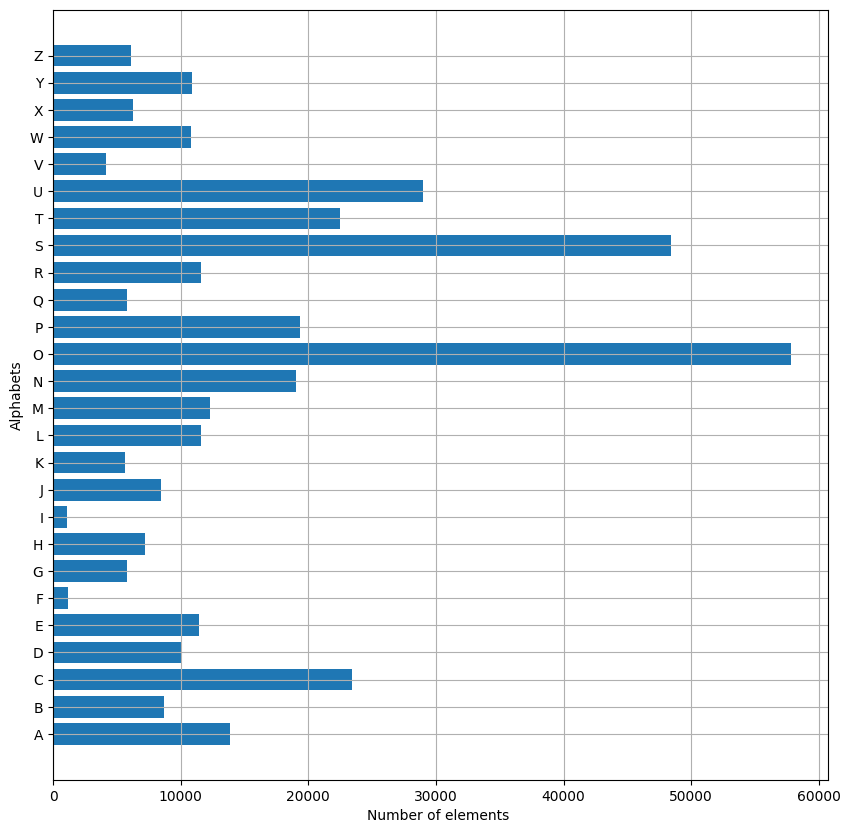

In [7]:
y_labels = np.intp(target_variable)
label_count = np.zeros(26, dtype='int')
for label in y_labels:
    label_count[label] +=1

alphabets_names = []
for label in label_to_alphabet.values():
    alphabets_names.append(label)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets_names, label_count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

# **SHUFFLING THE DATA**

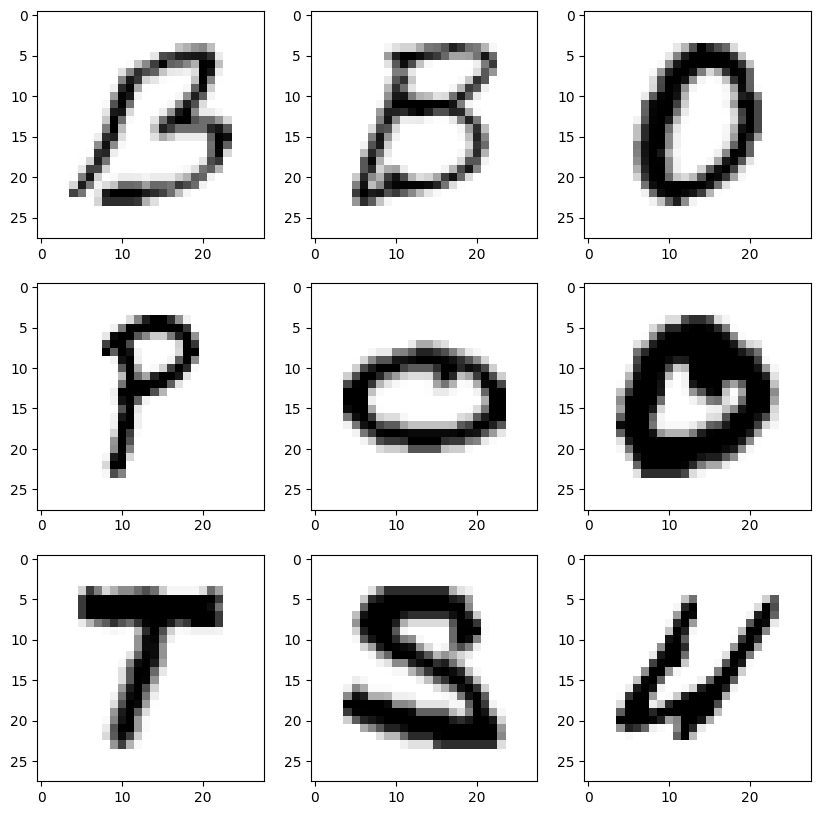

In [8]:
shuffled_data = shuffle(train_features[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    threshold_image = cv2.threshold(np.uint8(shuffled_data[i]), 30, 200, cv2.THRESH_BINARY)[1]
    axes[i].imshow(np.reshape(shuffled_data[i], (28,28)), cmap="Greys")
plt.show()

# **DATA RESHAPING**

In [9]:
reshaped_train_features = train_features.reshape(train_features.shape[0],train_features.shape[1],train_features.shape[2],1)
print("New shape of train data: ", reshaped_train_features .shape)

reshaped_test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], test_features.shape[2],1)
print("New shape of train data: ", reshaped_test_features.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [10]:
train_y_OHE = to_categorical(train_target, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_y_OHE.shape)

test_y_OHE = to_categorical(test_target, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_y_OHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# **CREATE CNN MODEL**

In [11]:
handwritten_model = Sequential()

handwritten_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
handwritten_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

handwritten_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
handwritten_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

handwritten_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
handwritten_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

handwritten_model.add(Flatten())

handwritten_model.add(Dense(64,activation ="relu"))
handwritten_model.add(Dense(128,activation ="relu"))

handwritten_model.add(Dense(26,activation ="softmax"))

# **COMPILING AND FITTING MODEL**

In [12]:
handwritten_model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

training_progress = handwritten_model.fit(reshaped_train_features, train_y_OHE, epochs=5,  validation_data = (reshaped_test_features,test_y_OHE))

Epoch 1/5
9312/9312 [==============================] - 237s 25ms/step - loss: 0.1565 - accuracy: 0.9576 - val_loss: 0.0755 - val_accuracy: 0.9795
Epoch 2/5
9312/9312 [==============================] - 230s 25ms/step - loss: 0.0736 - accuracy: 0.9798 - val_loss: 0.0641 - val_accuracy: 0.9839
Epoch 3/5
9312/9312 [==============================] - 232s 25ms/step - loss: 0.0609 - accuracy: 0.9832 - val_loss: 0.0761 - val_accuracy: 0.9812
Epoch 4/5
9312/9312 [==============================] - 232s 25ms/step - loss: 0.0553 - accuracy: 0.9851 - val_loss: 0.0571 - val_accuracy: 0.9857
Epoch 5/5
9312/9312 [==============================] - 231s 25ms/step - loss: 0.0521 - accuracy: 0.9863 - val_loss: 0.0617 - val_accuracy: 0.9853


In [13]:
handwritten_model.summary()
handwritten_model.save('my_model.keras')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [14]:
print("The validation accuracy is :", training_progress.history['val_accuracy'])
print("The training accuracy is :", training_progress.history['accuracy'])
print("The validation loss is :", training_progress.history['val_loss'])
print("The training loss is :", training_progress.history['loss'])

The validation accuracy is : [0.9794871807098389, 0.9839038848876953, 0.9811652302742004, 0.9857296347618103, 0.9852597713470459]
The training accuracy is : [0.9576184749603271, 0.9797691106796265, 0.9832192063331604, 0.9851322174072266, 0.9862532019615173]
The validation loss is : [0.07545672357082367, 0.06414955109357834, 0.07606281340122223, 0.05713173747062683, 0.06168097257614136]
The training loss is : [0.15648633241653442, 0.07356937229633331, 0.06085015460848808, 0.05525621771812439, 0.05205163732171059]


# **PREDICTIONS ON DATA**

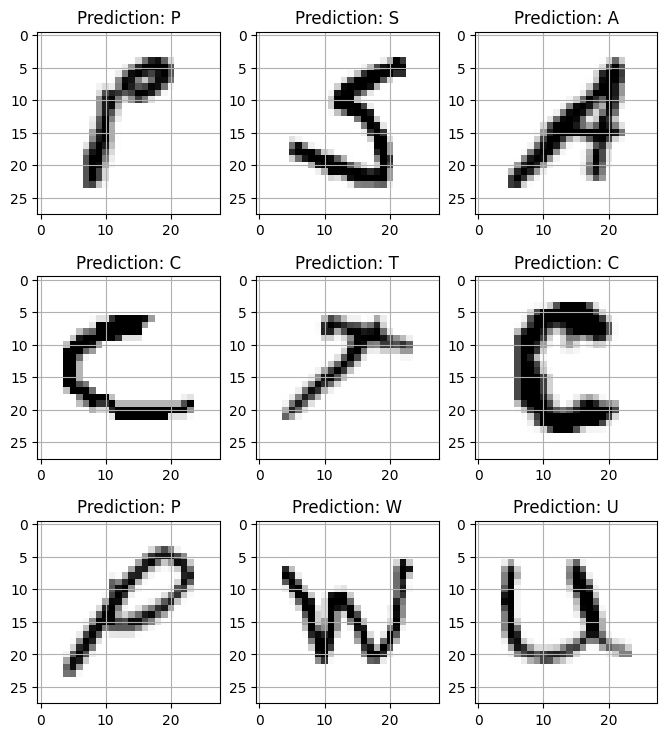

In [15]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for index,ax in enumerate(axes):
    current_image = np.reshape(reshaped_test_features[index], (28,28))
    ax.imshow(current_image, cmap="Greys")
    
    predicted_alphabet = label_to_alphabet[np.argmax(test_y_OHE[index])]
    ax.set_title("Prediction: "+predicted_alphabet)
    ax.grid()

# **PREDICTION ON EXTERNAL IMAGE**

In [16]:
original_image = cv2.imread(r'/kaggle/input/ext-image/Wn.png')
image_copy = original_image.copy()

rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(rgb_image, (400,440))

In [17]:
blurred_image = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

final_image = cv2.resize(binary_image, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))

1/1 [==============================] - 0s 161ms/step
Prediction: W


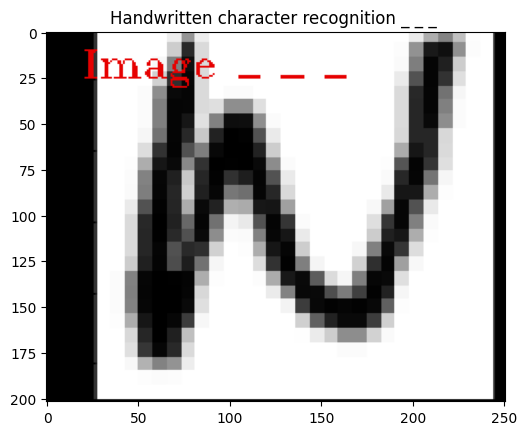

In [18]:
img_pred = label_to_alphabet[np.argmax(handwritten_model.predict(final_image))]

#print("Prediction:",img_pred)
cv2.putText(original_image, "Image _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))

print("Prediction:",img_pred)

cv2.putText(original_image, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
#cv2.imshow('Handwritten character recognition _ _ _ ', img)

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Handwritten character recognition _ _ _ ')
plt.show()
